In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
from scipy.special import expit
from scipy import optimize
from sklearn import preprocessing


In [2]:
data = scipy.io.loadmat('/Users/deepanjal.gupta/Documents/Learning/Stanford Machine Learning- Andrew Ng/Week 6/machine-learning-ex5/ex5/ex5data1.mat')

X =   data ['X']    
Xtest = data ['Xtest']  
Xval = data ['Xval']  

X = np.insert(X,0,1,axis=1)
Xtest = np.insert(Xtest,0,1,axis=1)
Xval = np.insert(Xval,0,1,axis=1)

y = data ['y']  
ytest = data ['ytest']  
yval = data ['yval']  

m = X.shape[0]
input_lambda = 1

theta = np.array((1,1))

In [3]:
print(X.shape)
print(y.shape)

(12, 2)
(12, 1)


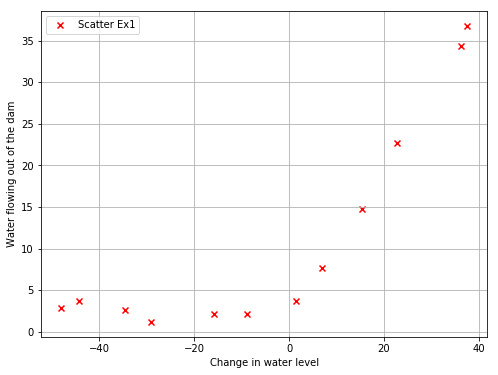

In [4]:
#plotting the training data
plt.figure(figsize = (8,6))
plt.grid(True)
plt.scatter(X[:,1],y,marker = 'x',c = 'r',label = 'Scatter Ex1')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend(loc = 2)
plt.show()

## 1. Regularized Linear Regression 

In [5]:
def hypothesis(theta,X):
    theta = theta.reshape((-1,1))
    return np.dot(X,theta)
    #hhypothesis(theta,X)
    
def cost_function(theta,X,y,m,input_lambda):
    return np.sum(np.square(hypothesis(theta,X) - y))/(2*m) + np.sum(np.dot(theta[1:],theta[1:]))*input_lambda/(2*m)  
    #cost_function(theta,X,y,m,input_lambda)  

def gradient_descent(theta,X,y,m,input_lambda):
    regterm = np.zeros(theta.reshape((-1,1)).shape)
    regterm[1:] = theta[1:].reshape((-1,1))
    output = np.dot(X.T,(hypothesis(theta,X) - y))/m   + np.square(regterm)*input_lambda/m
    return output.reshape(-1)
    #gradient_descent(theta,X,y,m,input_lambda)


In [6]:
result = optimize.fmin_bfgs(cost_function,x0 = theta , fprime = gradient_descent, args = (X,y,m,input_lambda),maxiter=100,disp=True,full_output=True)
result [1] 

Optimization terminated successfully.
         Current function value: 22.379542
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6


22.37954205100613

In [7]:
print(cost_function(theta,X,y,m,input_lambda) )
print(gradient_descent(theta,X,y,m,input_lambda))
print(theta)

303.99319222
[ -15.30301567  598.25074417]
[1 1]


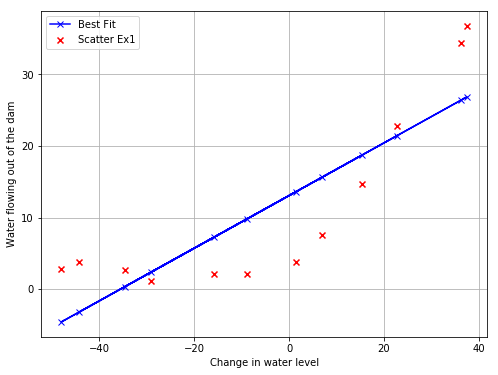

In [8]:
#plotting wit the 
plt.figure(figsize = (8,6))
plt.grid(True)
plt.scatter(X[:,1],y,marker = 'x',c = 'r',label = 'Scatter Ex1')
plt.plot(X[:,1],hypothesis(result[0],X),marker = 'x',c = 'b',label = 'Best Fit')

plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend(loc = 2)
plt.show()

# 2. Bias-variance

In [9]:
training_error  = []
cross_val_error = []
number_of_m     = []


for i in range(m):
    loop_X = X[0:(i+1)]
    loop_y = y[0:(i+1)]
    loop_m = X.shape[0]
    
    print(loop_X.shape)
    print(loop_y.shape)
    print(loop_m)
    result = optimize.fmin_bfgs(cost_function,x0 = theta , fprime = gradient_descent, args = (loop_X,loop_y,loop_m,input_lambda),maxiter=100,disp=True,full_output=True)
    #result [1]
    training_error.append(result [1])   
    number_of_m.append(i)
    
    theta_intermediate = result[0]
    cross_val_error.append(cost_function(theta_intermediate,Xval,yval,yval.shape[0],input_lambda))

(1, 2)
(1, 1)
12
         Current function value: 0.000186
         Iterations: 2
         Function evaluations: 111
         Gradient evaluations: 99
(2, 2)
(2, 1)
12
Optimization terminated successfully.
         Current function value: 0.000220
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
(3, 2)
(3, 1)
12
Optimization terminated successfully.
         Current function value: 0.833755
         Iterations: 5
         Function evaluations: 7
         Gradient evaluations: 7
(4, 2)
(4, 1)
12
Optimization terminated successfully.
         Current function value: 0.960616
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
(5, 2)
(5, 1)
12
         Current function value: 5.489281
         Iterations: 8
         Function evaluations: 77
         Gradient evaluations: 65
(6, 2)
(6, 1)
12
         Current function value: 9.730698
         Iterations: 7
         Function evaluations: 73
         Gradient eval

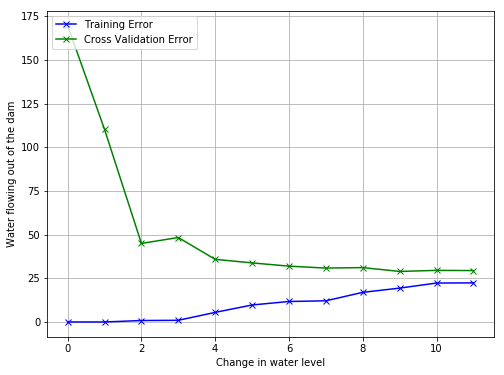

In [10]:
plt.figure(figsize = (8,6))
plt.grid(True)
plt.plot(number_of_m,training_error,marker = 'x',c = 'b',label = 'Training Error')
plt.plot(number_of_m,cross_val_error,marker = 'x',c = 'g',label = 'Cross Validation Error')

plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend(loc = 2)
plt.show()

# 3. Polynomial Regression 

In [11]:
def polynomial(X,order):
    for i in range(1,order):
        X = np.insert(X,(i+1),X[:,1]**(i+1),axis=1)
    return X

In [12]:
theta_polynomial_start = np.ones(9)
X_intermediate = np.insert(preprocessing.scale(polynomial(X,8))[:,1:],0,1,axis = 1)
pd.DataFrame(X_intermediate).head()


/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


,0,1,2,3,4,5,6,7,8
0,1.0,-0.378244,-0.788662,0.190329,-0.737591,0.320252,-0.617152,0.359835,-0.531091
1,1.0,-0.838920,0.001314,-0.258962,-0.341565,0.097549,-0.455197,0.266773,-0.468874
2,1.0,1.438717,0.610832,1.305341,0.256220,1.021863,-0.012696,0.790210,-0.177927
3,1.0,1.484123,0.738068,1.420312,0.413122,1.155348,0.131224,0.910700,-0.062290
4,1.0,-1.497919,1.936440,-2.127747,2.435101,-2.518767,2.717922,-2.763317,2.889082


In [13]:
cost_function(theta_polynomial_start,X_intermediate,y,m,input_lambda)

103.98650775912115

In [14]:
gradient_descent(theta_polynomial_start,X_intermediate,y,m,input_lambda).shape

(9,)

In [15]:
result = optimize.fmin_bfgs(cost_function,x0 = theta_polynomial_start , fprime = gradient_descent, args = (X_intermediate,y,m,input_lambda),maxiter=10000,disp=True,full_output=True)
print(result [1] )
print(result[0])

         Current function value: 9.190470
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
9.190469580190626
[ 11.23501869   5.2057671    3.41804304   3.80750799   2.43246184
   2.83318183   1.77738673   2.17427915   1.32894521]


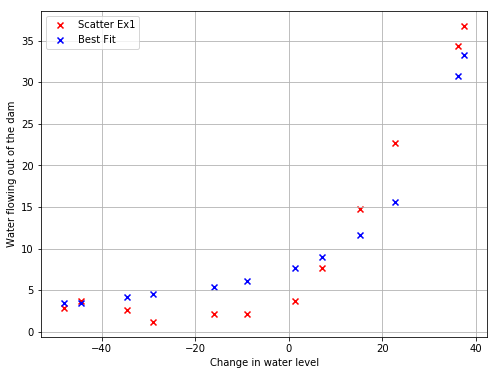

In [16]:
#plotting the training data
plt.figure(figsize = (8,6))
plt.grid(True)
plt.scatter(X[:,1],y,marker = 'x',c = 'r',label = 'Scatter Ex1')
plt.scatter(X[:,1],hypothesis(result[0],X_intermediate),marker = 'x',c = 'b',label = 'Best Fit')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend(loc = 2)
plt.show()